In [2]:
%reload_ext autoreload
%autoreload
%matplotlib inline
import os, json,glob,sys,io
from types import SimpleNamespace
from experiment import run_model
from eval import calculate_stats, eval_model
import pickle
from datetime import datetime 
import torch
from torch import nn
from transformers import BertTokenizer
from model.MedClinical import Biobert_fc 
from sklearn.metrics import classification_report, f1_score
from util.tools  import load_config
from util.DataLoader  import *
from pathlib import Path, PureWindowsPath, PurePosixPath
import traceback
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [4]:
config_folder = "config/"
config = load_config(config_folder)

In [5]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_train_metrics = list(data_folder.glob('*.pkl'))
num_labels = 9

f1_score_list = []
file_list = []
for metrics_file in list_train_metrics:
#    
    if str(metrics_file).find('BioBERT_CNN_fc2020-12-04 01_29_20_732477_train_metrics_.pkl') > 0 or \
       str(metrics_file).find('BioBERT_CNN_fc2020-12-03 23_34_01_358676_train_metrics_.pkl') > 0 or \
       str(metrics_file).find('BioBERT_CNN_fc2020-12-04 11_39_46_216904_train_metrics_.pkl') > 0  or \
       str(metrics_file).find('BioBERT_CNN_fc2020-12-04 14_08_18_271394_train_metrics_.pkl') > 0:
        file_list.append(metrics_file)
        with open(metrics_file,"rb") as f:
            train_metric = pickle.load(f)
#             print(train_metric)

        print("\n \n \n")
        plt.figure(figsize=(12,6))
        if (np.mean(np.array(train_metric)[:,1])) < 1300:
            print('training metric file', metrics_file)
            plt.plot(np.array(train_metric)[:,0], np.array(train_metric)[:,1])
            plt.xlabel("epoch")
            plt.ylabel("loss")
#         plt.legend(file_list, loc='upper right')
    

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

outputs\re\BioBERT_CNN_fc2020-12-03 08_07_22_975827_train_metrics_.pkl

 
 



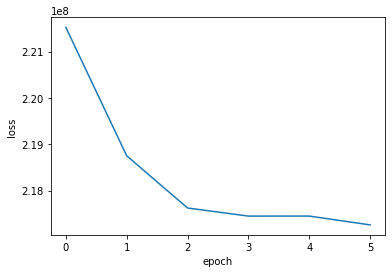

In [20]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_train_metrics = list(data_folder.glob('*.pkl'))
num_labels = 9

f1_score_list = []
file_list = []
for metrics_file in list_train_metrics:
    if str(metrics_file).find('BioBERT_CNN_fc2020-12-03 08_07_22_975827_train_metrics_') > 0:
        file_list.append(metrics_file)
        with open(metrics_file,"rb") as f:
            train_metric = pickle.load(f)
            print(metrics_file)
#             print("\n",train_metric)

        print("\n \n \n")
#         plt.figure(figsize=(12,6))
#         if ((np.mean(np.array(train_metric)[:,1])) >  3.42e8 and np.mean(np.array(train_metric)[:,1]) <  3.43e8):
# #             print('training metric file', metrics_file)
        plt.plot(np.array(train_metric)[:,0], np.array(train_metric)[:,1])
        plt.xlabel("epoch")
        plt.ylabel("loss")
#         plt.legend(file_list, loc='upper right')
    